In [1]:
import utils.json_to_df as j
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tier_name = "Ultimate"
additional_fields = {
    "f2p": ["flags", "f2p"],
    "release": ["basic_info", "original_release_date"],
}

df = j.get_collapsed_df(tier_name, additional_fields=additional_fields)
df.head(10)

,base_id,title,pid,added,removed,f2p,release
0,10.0,Jade Empire: Special Edition,9PJFC8RLNPH5,2021-03-18,NaT,False,2007-02-27
1,13.0,Fallout: A Post Nuclear Role Playing Game,9N42CT1J5WGW,2021-06-13,NaT,False,1997-10-10
2,14.0,Fallout 2,9P1JS86M9SXH,2021-06-13,NaT,False,1998-10-29
3,15.0,Fallout 3,9NBZ9JF6TFMD,2021-06-13,NaT,False,2008-10-28
4,16.0,Fallout: New Vegas,BX3JNK07Z6QK,2019-10-17,NaT,False,2010-10-19
5,17.0,Fallout Tactics: Brotherhood of Steel,9NDV7FRVD7ML,2021-06-13,NaT,False,2001-03-15
6,20.0,BioShock,BTBMZQ3FM2V8,2017-06-01,2018-05-02,False,2007-08-21
7,21.0,BioShock 2,BVXR4C8LTHS1,2017-06-01,2018-05-03,False,2010-02-09
8,35.0,Dungeon Keeper,9PKDX735TR8K,2021-03-18,NaT,False,1997-06-26
9,36.0,Dungeon Keeper 2,9NGL4GBPXM1G,2021-03-18,NaT,False,1999-06-25


In [4]:
df.release = pd.to_datetime(df.release, format="%Y-%m-%d", errors="coerce")


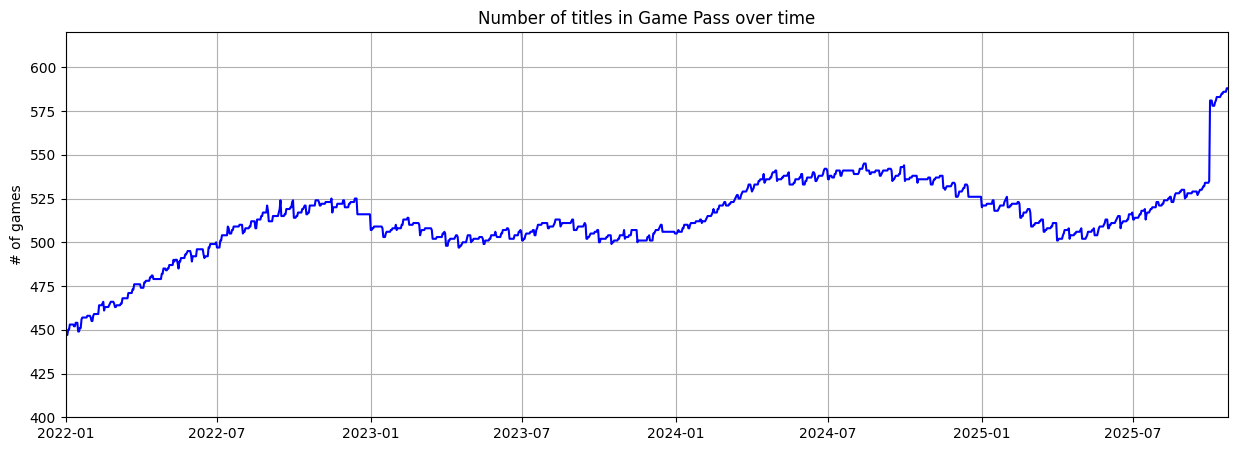

In [ ]:
# Total available titles
def count_available_titles(target_date):
    """Returns the count of available titles on a given date."""
    available_titles = df[
        (df["added"] <= target_date)
        & ((df["removed"].isna()) | (df["removed"] > target_date))
        & (df.f2p != 1)
    ]
    return len(available_titles)


# Generate a date range for visualization
start_date = df["added"].min()
end_date = pd.Timestamp.today()  # or max(df["left"].dropna()) for last known date
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

# Compute availability counts for each date
available_counts = [count_available_titles(date) for date in date_range]

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(
    date_range,
    available_counts,
    color="blue",
)
plt.ylabel("# of games")
plt.xlim(pd.to_datetime("2022-01-01"), end_date)
plt.ylim(400, 620)
plt.title("Number of titles in Game Pass over time")
plt.grid(True)
plt.show()

C:\Users\pawel\AppData\Local\Temp\ipykernel_16808\2008961020.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = df2["added"].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_16808\2008961020.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name


<Figure size 1500x600 with 0 Axes>

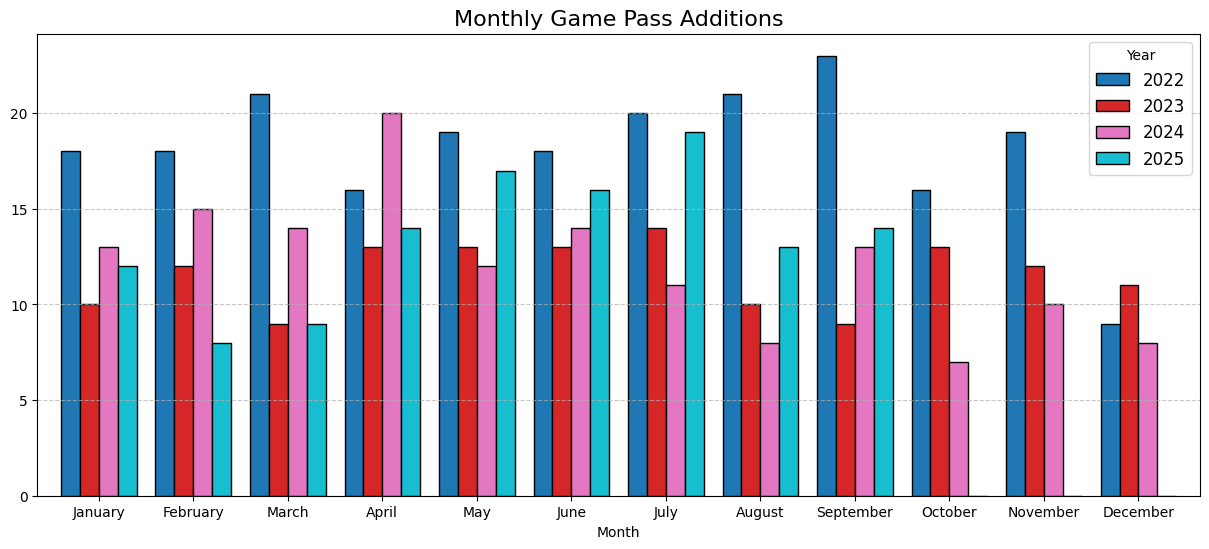

In [ ]:
# Monthly additions 2022 - Sep 2025

# Filter the DataFrame for the specified date range
start_date = "2022-01-01"
end_date = "2025-09-30"
df2 = df[(df["added"] >= start_date) & (df["added"] <= end_date) & (df["f2p"] != 1)]


# Extract year and month name
df2["Year"] = df2["added"].dt.year
df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name

# Count occurrences per (Month, Year)
month_counts = df2.groupby(["Month", "Year"]).size().reset_index(name="Count")

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

month_counts["Month"] = pd.Categorical(
    month_counts["Month"], categories=month_order, ordered=True
)

# Pivot the data so that each year becomes a separate column
pivot_data = month_counts.pivot(index="Month", columns="Year", values="Count").fillna(0)


# Plot
plt.figure(figsize=(15, 6))
pivot_data.plot(
    kind="bar", width=0.8, figsize=(15, 6), colormap="tab10", edgecolor="black"
)

plt.title("Monthly Game Pass Additions", fontsize=16)
plt.xticks(rotation=0)
plt.legend(title="Year", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

C:\Users\pawel\AppData\Local\Temp\ipykernel_16808\4006947506.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = df2["added"].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_16808\4006947506.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name


<Figure size 1500x600 with 0 Axes>

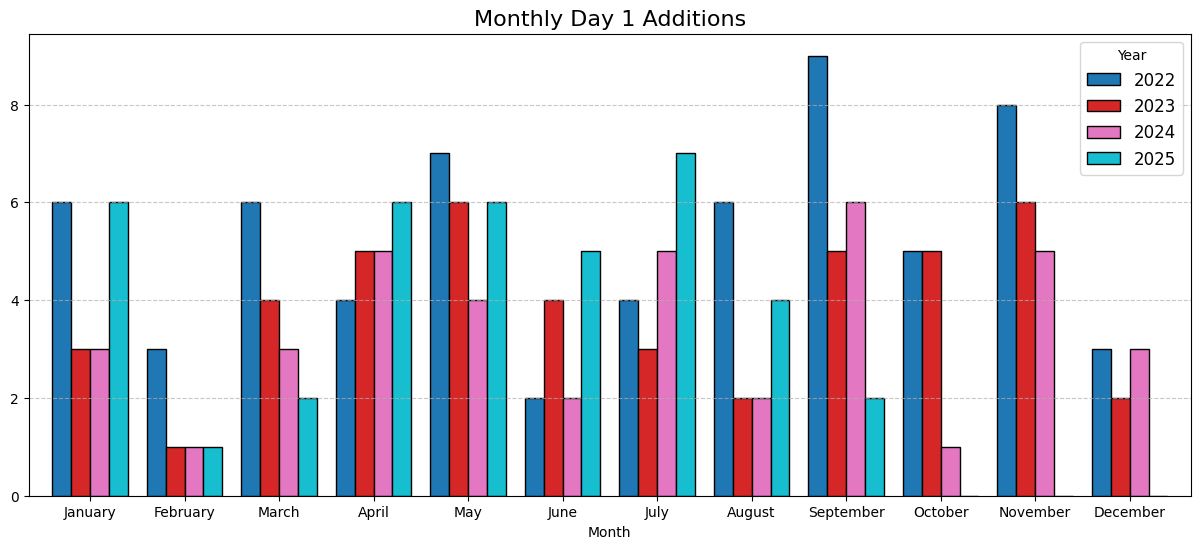

In [7]:
# Monthly day 1 additions 2022 - Sep 2025

# Filter the DataFrame for the specified date range
start_date = "2022-01-01"
end_date = "2025-09-30"
df.release = pd.to_datetime(df.release, format="%Y-%m-%d", errors="coerce")
df2 = df[
    (df["added"] >= start_date)
    & (df["added"] <= end_date)
    & (abs((df.release - df.added).dt.days) < 10)
    & (df["f2p"] != 1)
]


# Extract year and month name
df2["Year"] = df2["added"].dt.year
df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name

# Count occurrences per (Month, Year)
month_counts = df2.groupby(["Month", "Year"]).size().reset_index(name="Count")

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

month_counts["Month"] = pd.Categorical(
    month_counts["Month"], categories=month_order, ordered=True
)

# Pivot the data so that each year becomes a separate column
pivot_data = month_counts.pivot(index="Month", columns="Year", values="Count").fillna(0)


# Plot
plt.figure(figsize=(15, 6))
pivot_data.plot(
    kind="bar", width=0.8, figsize=(15, 6), colormap="tab10", edgecolor="black"
)

plt.title("Monthly Day 1 Additions", fontsize=16)
plt.xticks(rotation=0)
plt.legend(title="Year", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [8]:
additional_fields = {
    "engine": ["igdb_meta", "main", "engine"],
}
df_engines = j.get_collapsed_df("Ultimate", additional_fields=additional_fields)
result = df_engines.engine.value_counts()
result.head(10)

engine
[]                   560
[Unity]              293
[Unreal Engine 4]    189
[Unreal Engine 3]     49
[Frostbite]           37
[Unreal Engine 5]     34
[AnvilNext]           15
[Ego Engine]          12
[Frostbite 3]         11
[Telltale Tool]       10
Name: count, dtype: int64